# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
My_BTC = 1.2
My_ETH = 5.3

In [4]:
# Crypto API URLs
BTC_URL = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
ETH_URL = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
requests.get(BTC_URL)

<Response [200]>

In [5]:
# Fetch current BTC price
Fetch_Data = requests.get(BTC_URL).json()
Price_BTC = Fetch_Data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
Fetch_Data = requests.get(ETH_URL).json()
Price_ETH = Fetch_Data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
My_BTC_Value = My_BTC * Price_BTC
My_ETH_Value = My_ETH * Price_ETH

# Print current crypto wallet balance
print(f"The current value of your {My_BTC} BTC is ${My_BTC_Value:0.2f}")
print(f"The current value of your {My_ETH} ETH is ${My_ETH_Value:0.2f}")

The current value of your 1.2 BTC is $22049.86
The current value of your 5.3 ETH is $3260.51


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
My_SPY = 50
My_AGG = 200

In [7]:
# Set Alpaca API key and secret
Alpaca_API_Key = os.getenv("ALPACA_API_KEY")
Alpaca_Secret_Key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
Alpaca = tradeapi.REST(
    Alpaca_API_Key,
    Alpaca_Secret_Key,
    api_version="v2")

In [8]:
# Format current date as ISO format
Now = pd.Timestamp("2020-10-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
Data = Alpaca.get_barset(
    tickers,
    timeframe,
    start = Now,
    end = Now
).df

# Preview DataFrame
Data

AGG                                        SPY  \
                            open    high       low   close   volume    open   
2020-10-27 00:00:00-04:00  117.8  117.91  117.7275  117.87  5016038  339.76   

                                                             
                             high     low   close    volume  
2020-10-27 00:00:00-04:00  340.12  337.99  338.25  50634843

In [9]:
# Pick AGG and SPY close prices
AGG_Close_Price = Data["AGG"]["close"][0]
SPY_Close_Price = Data["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_Close_Price}")
print(f"Current SPY closing price: ${SPY_Close_Price}")

Current AGG closing price: $117.87
Current SPY closing price: $338.25


In [10]:
# Compute the current value of shares
My_SPY_Value = My_SPY * SPY_Close_Price
My_AGG_Value = My_AGG * AGG_Close_Price

# Print current value of share
print(f"The current value of your {My_SPY} SPY shares is ${My_SPY_Value:0.2f}")
print(f"The current value of your {My_AGG} AGG shares is ${My_AGG_Value:0.2f}")

The current value of your 50 SPY shares is $16912.50
The current value of your 200 AGG shares is $23574.00


### Savings Health Analysis

In [11]:
# Set monthly household income
Monthly_Income = 12000

# Create savings DataFrame
All_Savings = pd.DataFrame(
    [
        [My_BTC_Value + My_ETH_Value],
        [My_SPY_Value + My_AGG_Value]
    ],
    index = ["Cryptos Value", "Stocks Value"],
    columns = ["amount"]
)

# Display savings DataFrame
display(All_Savings)

,amount
Cryptos Value,25310.363
Stocks Value,40486.500


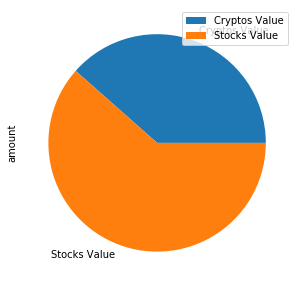

In [12]:
# Plot savings pie chart
All_Savings.plot(kind = "pie", y = "amount", figsize = (5,5))

In [13]:
# Set ideal emergency fund
Emergency_Fund = Monthly_Income * 3

# Calculate total amount of savings
Total_Savings = All_Savings["amount"]["Cryptos Value"] + \
    All_Savings["amount"]["Stocks Value"]

# Validate saving health
if Total_Savings > Emergency_Fund:
    print("Congratulations for having enough money in this Fund!")
elif Total_Savings == Emergency_Fund:
    print("Congratulations for reaching your Financial Goals")
else:
    print(f"You are ${(Emergency_Fund - Total_Savings):0.2f} away from reaching your Goal")

Congratulations for having enough money in this Fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = Alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc = MCSimulation(
    df_stock_data,
    num_simulation = 500,
    num_trading_days = 30*252
)
mc

In [17]:
# Printing the simulation input data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992986,1.003660,1.000890,0.996888,0.993463,1.002517,1.006188,0.991591,1.002998,1.003620,...,0.993755,0.994630,0.997340,0.996943,1.002730,0.992394,1.003714,0.995792,1.008059,1.005712
2,0.991437,1.001483,1.004454,0.981864,0.991873,0.996168,1.005444,0.997939,0.996863,1.001639,...,0.994190,1.003044,0.990585,1.001420,1.006169,0.992821,1.004698,1.005679,1.011200,1.009789
3,0.996912,1.007622,0.997939,0.985994,0.997884,0.992723,1.011645,0.990726,1.001327,0.997875,...,0.996362,0.999492,0.992490,1.000563,0.997720,0.995554,0.998678,1.010128,1.015097,1.011216
4,0.995128,1.020040,1.004998,0.980770,0.994885,0.978809,1.008673,0.994318,0.990257,0.998287,...,1.007828,1.000987,0.996983,0.995144,1.002971,0.995513,0.995561,1.007587,1.007470,1.017419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.083560,4.780778,7.664756,2.790978,7.191733,3.747503,1.904598,3.509858,3.030819,8.397126,...,2.517666,3.222894,2.646578,5.321099,20.248571,4.429021,8.817828,8.738530,7.367526,3.267205
7557,8.059597,4.808963,7.644135,2.800865,7.138317,3.773799,1.900017,3.515214,3.005058,8.397642,...,2.522384,3.194608,2.665599,5.307598,20.365496,4.429162,8.812593,8.797833,7.357940,3.235157
7558,7.976069,4.813111,7.649796,2.804720,7.158538,3.747889,1.908160,3.503875,3.024738,8.393390,...,2.483213,3.167743,2.666091,5.260816,20.435339,4.452464,8.875463,8.810453,7.272982,3.216640
7559,7.874077,4.854091,7.653997,2.813085,7.206886,3.753503,1.919565,3.528897,3.034829,8.430817,...,2.474664,3.152017,2.681020,5.277769,20.490976,4.476627,8.926379,8.766397,7.314206,3.220063


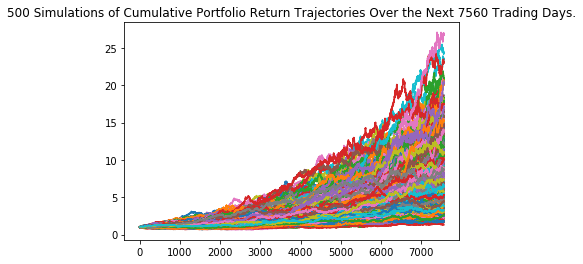

In [19]:
# Plot simulation outcomes
mc.plot_simulation()

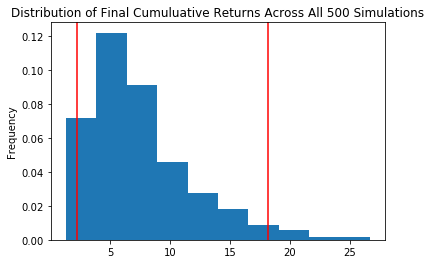

In [20]:
# Plot probability distribution and confidence intervals
mc.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
Summary_Statistics = mc.summarize_cumulative_return()

# Print summary statistics
print(Summary_Statistics)

count           500.000000
mean              7.526237
std               4.262198
min               1.297791
25%               4.412557
50%               6.503438
75%               9.524964
max              26.702440
95% CI Lower      2.248046
95% CI Upper     18.147014
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = Summary_Statistics[8] * initial_investment
ci_upper = Summary_Statistics[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $44960.92846613611 and $362940.2852211273


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(Summary_Statistics[8] * initial_investment, 2)
ci_upper = round(Summary_Statistics[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $67441.39 and $544410.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5Years = MCSimulation(
    df_stock_data,
    num_simulation = 500,
    num_trading_days = 5*252
)
mc_5Years

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5Years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005148,0.982442,0.994614,0.999494,1.001639,0.991680,0.990523,0.991869,0.991964,0.998712,...,0.993423,1.014297,1.006791,0.997826,1.003241,0.999363,1.005866,1.005851,0.982478,0.997042
2,1.005780,0.978769,0.997811,1.005203,0.986771,0.982745,0.992803,0.982048,0.998370,0.998165,...,0.993855,1.011380,1.008600,0.998415,1.013104,1.004345,1.003892,1.013847,0.989967,0.993253
3,1.003776,0.973135,0.993751,1.001038,0.980990,0.981772,0.991950,0.976481,1.002568,0.994023,...,0.987044,1.002745,1.013502,0.993426,1.005486,1.004782,0.995301,1.018309,0.982763,0.984633
4,1.002118,0.965569,0.995381,1.010331,0.973352,0.983969,0.987495,0.979068,1.016474,1.003685,...,0.986420,1.011967,1.023849,0.996556,1.003945,1.013242,0.991662,1.013302,0.979968,0.982281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.670401,1.154185,0.864420,1.376027,1.310081,1.434226,1.917380,1.214071,1.550314,1.903050,...,0.681849,1.237152,1.547764,1.273096,1.819243,1.399820,1.249344,1.250989,1.352929,1.326070
1257,1.675491,1.152694,0.868085,1.376785,1.312514,1.443033,1.916471,1.205884,1.551302,1.924260,...,0.683262,1.253654,1.534511,1.278196,1.820954,1.397690,1.253099,1.246215,1.335659,1.328319
1258,1.663808,1.144929,0.865757,1.365245,1.312359,1.440090,1.937134,1.208892,1.555573,1.916286,...,0.682619,1.255141,1.535591,1.276888,1.830460,1.406792,1.252972,1.246207,1.345760,1.331052
1259,1.680334,1.139413,0.870981,1.344529,1.307062,1.424854,1.927300,1.205060,1.557208,1.907180,...,0.682579,1.264959,1.548862,1.286626,1.823009,1.403731,1.240617,1.258309,1.349779,1.335660


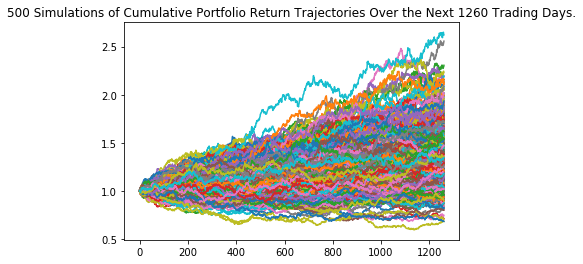

In [26]:
# Plot simulation outcomes
mc_5Years.plot_simulation()

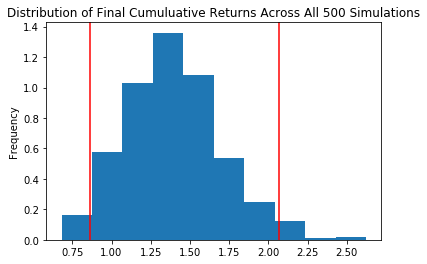

In [27]:
# Plot probability distribution and confidence intervals
mc_5Years.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
Summary_Statistics_1 = mc_5Years.summarize_cumulative_return()

# Print summary statistics
print(Summary_Statistics)

count           500.000000
mean              7.526237
std               4.262198
min               1.297791
25%               4.412557
50%               6.503438
75%               9.524964
max              26.702440
95% CI Lower      2.248046
95% CI Upper     18.147014
Name: 7560, dtype: float64


In [29]:
# Set initial investment
initial_investment_1 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(Summary_Statistics_1[8] * initial_investment_1, 2)
ci_upper_five = round(Summary_Statistics_1[9] * initial_investment_1, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_1} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51869.24 and $123984.33


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10Years = MCSimulation(
    df_stock_data,
    num_simulation = 500,
    num_trading_days = 10*252
)
mc_10Years

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10Years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999975,1.004413,1.001502,0.998483,0.995746,1.007386,1.001149,1.003596,1.006913,0.997400,...,1.004811,1.005023,0.993952,0.999070,0.999927,1.006971,0.998818,1.002207,1.008081,1.007344
2,0.990222,1.009208,0.996526,1.004950,0.990932,1.004916,1.002968,1.003619,1.015327,0.996660,...,1.006384,1.009134,0.995123,0.997389,0.996427,1.002371,1.007799,0.995199,1.007526,1.003483
3,0.996529,1.008406,0.993288,1.013082,0.993728,1.002763,0.995321,1.001534,1.013841,1.003101,...,1.014113,1.006384,1.000791,1.002629,0.999924,1.005267,1.006600,0.998319,1.003446,1.002520
4,0.990850,1.004109,0.995114,1.007876,0.997635,1.007198,0.998484,1.004040,1.020821,1.012471,...,1.005175,0.999301,1.000175,1.008980,0.996704,1.005908,1.024947,0.998241,0.995229,1.000269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.146044,3.020655,1.266987,2.064453,3.429122,1.859217,1.483893,1.246027,1.699026,1.485771,...,1.377455,1.658653,1.741505,2.282321,1.975717,2.495854,2.425699,2.852973,2.205112,2.250789
2517,2.148690,3.041300,1.270146,2.087057,3.420864,1.866183,1.464053,1.261360,1.684119,1.476204,...,1.377815,1.650015,1.731855,2.267949,1.973842,2.465732,2.443779,2.870445,2.181322,2.236225
2518,2.151085,3.038779,1.279098,2.094318,3.414380,1.876876,1.449080,1.263083,1.691187,1.455339,...,1.373807,1.645247,1.736921,2.282917,1.983295,2.463375,2.431725,2.863679,2.178216,2.242204
2519,2.140758,3.028731,1.281988,2.090161,3.449280,1.887195,1.456222,1.254361,1.686910,1.457986,...,1.375172,1.645408,1.729217,2.276831,1.974283,2.452502,2.430404,2.838268,2.195137,2.262008


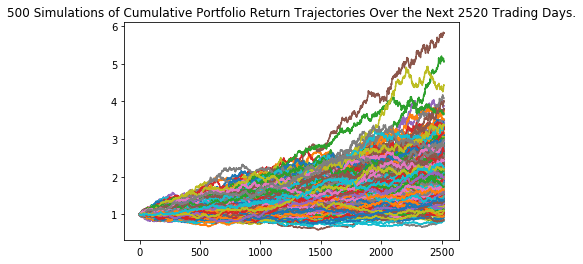

In [32]:
# Plot simulation outcomes
mc_10Years.plot_simulation()

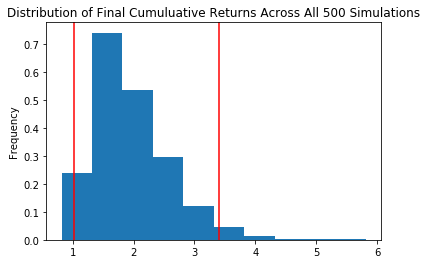

In [33]:
# Plot probability distribution and confidence intervals
mc_10Years.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
Summary_Statistics_2 = mc_10Years.summarize_cumulative_return()

# Print summary statistics
print(Summary_Statistics_2)

count           500.000000
mean              1.967440
std               0.647077
min               0.817643
25%               1.528300
50%               1.830797
75%               2.293026
max               5.817763
95% CI Lower      1.015018
95% CI Upper      3.403163
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_2 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(Summary_Statistics_2[8] * initial_investment_2, 2)
ci_upper_ten = round(Summary_Statistics_2[9] * initial_investment_2, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $60901.09 and $204189.79
